In [1]:
import pandas as pd
 
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
 
# tampilkan 10 baris pertama
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


C:\Users\Gustian\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Inertia')

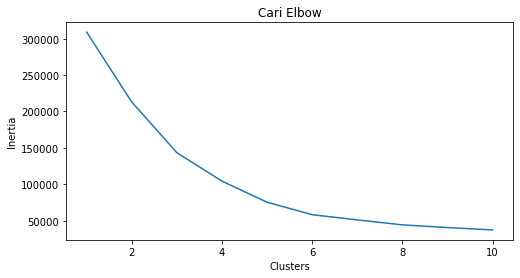

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Menjalankan `kMeans` dengan nilai k yang sudah didapat dari Elbow tadi yaitu 5.

C:\Users\Gustian\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


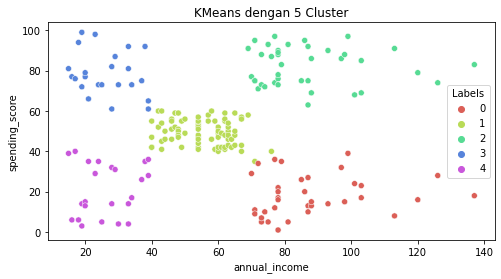

In [6]:
# membuat objek KMeans
kmeans_5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = kmeans_5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()